# HW1 : Data Science in Twitter Data
Ken Morton

## Data Collection: Download Twitter Data using API

* As the first step of Data Science process, let's collect some twitter data. Choose a keyword and search tweets containing the keyword by using Twitter search API, and then download the searched tweets (including the meta data that the Search API returns) in a file. It is recommended that the number of searched tweets should be at least 300.
* Store the tweets you downloaded into a local file (txt file or json file) 

In [1]:
import twitter
import json
from urllib.parse import unquote

# Function used to login to the twitter API
def oauthLogin():
    # Go to http://twitter.com/apps/new to create an app and get values
    # for these credentials that you'll need to provide in place of these
    # empty string values that are defined as placeholders.
    # See https://dev.twitter.com/docs/auth/oauth for more information 
    # on Twitter's OAuth implementation.
    
    CONSUMER_KEY = 'INSERT_API_KEY_HERE'
    CONSUMER_SECRET = 'INSERT_API_SECRET_KEY_HERE'
    OAUTH_TOKEN = 'INSERT_ACCESS_TOKEN_HERE'
    OAUTH_TOKEN_SECRET = 'INSERT_ACCESS_TOKEN_SECRET_HERE'
    
    auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                               CONSUMER_KEY, CONSUMER_SECRET)
    
    twitterAPI = twitter.Twitter(auth=auth)
    return twitterAPI

# Login to the twitter API
twitterAPI = oauthLogin();

query = 'boston' # The term to search twitter with
count = 100 # Number of tweets to retrieve per batch
tweetCount = 0 # Total number of tweets retrieved

print("Retrieving tweets...")

# Search twitter and get statuses
searchResults = twitterAPI.search.tweets(q=query, count=count)
statuses = searchResults['statuses']

# Iterate through 3 more batches of results by following the cursor
for _ in range(3):
    try:
        nextResults = searchResults['search_metadata']['next_results']
    except KeyError as e: # No more results when next_results doesn't exist
        break

    # Create a dictionary from next_results, which has the following form:
    # ?max_id=847960489447628799&q=%23RIPSelena&count=100&include_entities=1
    kwargs = dict([ kv.split('=') for kv in unquote(nextResults[1:]).split("&") ])

    searchResults = twitterAPI.search.tweets(**kwargs)
    statuses += searchResults['statuses']

# Determine how many tweets were retrieved
tweetCount = len(statuses)
print("Finished retrieving ", tweetCount, " tweets, now writing to file.");

# Save to a file
with open('twitterData.json', 'w') as outfile:  
    json.dump(statuses, outfile, indent=4)

Retrieving tweets...
Finished retrieving  389  tweets, now writing to file.


In [2]:
### Report  statistics about the tweets you collected 

In [3]:
print("What keyword did you choose?: ", query)

What keyword did you choose?:  boston


In [4]:
print("The total number of tweets collected: ", tweetCount)

The total number of tweets collected:  389


# Data Exploration: Exploring the Tweets and Tweet Entities

**(1) Word Count:** 
* Load the tweets you collected in the local file (txt or json)
* compute the frequencies of the words being used in these tweets. 
* Plot a table of the top 30 most-frequent words with their counts

In [5]:
import operator 
import json
from collections import Counter
from prettytable import PrettyTable

# Read in the tweet data
with open('twitterData.json') as file:
    twitterData = json.loads(file.read())

# Obtain the texts of the tweets
statusTexts = [status.get('text') 
                for status in twitterData]

# Obtain list of all the words in the twitter statuses
words = [word 
         for t in statusTexts 
             for word in t.split()]

# Pass our words to a Counter
counter = Counter(words) 
  
# Get the most common words
mostCommonWords = counter.most_common(30)

# Print our data to a nice table
mostCommonWordsTable = PrettyTable()
mostCommonWordsTable.field_names = ["Word", "Count"]

for word in mostCommonWords:
    mostCommonWordsTable.add_row([word[0], word[1]])

print(mostCommonWordsTable)

+----------------+-------+
|      Word      | Count |
+----------------+-------+
|       RT       |  201  |
|      the       |  170  |
|     Boston     |  148  |
|       to       |  145  |
|       in       |  103  |
|       a        |   99  |
|      and       |   85  |
|       of       |   69  |
|       on       |   59  |
|      for       |   52  |
|       be       |   45  |
|       I        |   45  |
|   Mozambique   |   40  |
|       is       |   40  |
|       at       |   37  |
|      been      |   35  |
|       by       |   34  |
|      down      |   33  |
|     first      |   33  |
|       go       |   32  |
|       as       |   31  |
|      from      |   31  |
|      you       |   31  |
|      city      |   30  |
| @EricHolthaus: |   29  |
|     having     |   29  |
|   completely   |   29  |
|     Beira,     |   28  |
|     “will      |   28  |
|    history     |   28  |
+----------------+-------+


** (2) Find the most popular tweets in your collection of tweets**

Please plot a table of the top 10 most-retweeted tweets in your collection, i.e., the tweets with the largest number of retweet counts.


In [6]:
from operator import itemgetter
import textwrap

# Get tweet and its retweet count
retweetData = [{"tweet": item.get('text'), "retweets": int(item.get('retweet_count'))}
               for item in twitterData]

# Sort tweets in descending order by number of retweets
sortedDecending = sorted(retweetData, key=itemgetter("retweets"), reverse=True)

# Print our data to a nice table
retweetTable = PrettyTable()
retweetTable.field_names = ["Tweet", "Retweets"]

for t in sortedDecending[:10]:
    retweetTable.add_row([textwrap.fill(t["tweet"], 75), t["retweets"]])

print(retweetTable)

+-----------------------------------------------------------------------------+----------+
|                                    Tweet                                    | Retweets |
+-----------------------------------------------------------------------------+----------+
|   RT @ArianaGrande: i am still a basketcase and cannot believe any of this  |   7442   |
|     shit is real. i am so grateful. what a beautiful thing. thanks a m…     |          |
| RT @BillSimmons: Gronk  3-Time champ Top-5 Patriot ever Best tight end I’ve |   4031   |
|       ever seen Incredible big game guy One of the most lovable Bosto…      |          |
| RT @RedSox: A couple of retired Boston sports legends and champs.   Thanks, |   1726   |
|                        Gronk! https://t.co/JfabUDVCBo                       |          |
|   RT @BeckyLynchWWE: Boston, let’s celebrate together, shall we? Cause The  |   1284   |
|              Man is coming round. #Raw https://t.co/jUwj4WjYwl              |          |

**(3) Find the most popular Tweet Entities in your collection of tweets**

Please plot the top 10 most-frequent hashtags and top 10 most-mentioned users in your collection of tweets.

In [7]:
# Get hashtags
hashtags = [hashtag.get('text')
            for status in twitterData
                for hashtag in status.get('entities').get('hashtags')]

# Get user mentions
userMentions = [userMention.get('screen_name')
                for status in twitterData
                    for userMention in status.get('entities').get('user_mentions')]

# Get the most common hashtags and user mentions
mostCommonHashtags = Counter(hashtags).most_common(10)
mostMentionedUsers = Counter(userMentions).most_common(10)

# Print our hashtag data to a nice table
hashtagTable = PrettyTable()
hashtagTable.field_names = ["Most Common Hashtags", "Count"]

for h in mostCommonHashtags:
    hashtagTable.add_row([h[0], h[1]])

print(hashtagTable)

# Print our user data to a nice table
mentionedUserTable = PrettyTable()
mentionedUserTable.field_names = ["Most Mentioned Users", "Count"]

for u in mostMentionedUsers:
    mentionedUserTable.add_row([u[0], u[1]])

print(mentionedUserTable)

+----------------------+-------+
| Most Common Hashtags | Count |
+----------------------+-------+
|       GoBolts        |   14  |
|         Raw          |   13  |
|       BOSvsTBL       |   12  |
|         RAW          |   8   |
|         Cubs         |   7   |
|        WWERAW        |   4   |
|        Boston        |   4   |
|         cnn          |   3   |
|       sitroom        |   3   |
|       TheLead        |   3   |
+----------------------+-------+
+----------------------+-------+
| Most Mentioned Users | Count |
+----------------------+-------+
|     EricHolthaus     |   29  |
|     Section10Pod     |   16  |
|    BeckyLynchWWE     |   12  |
|     TBLightning      |   12  |
|         350          |   10  |
|         WWE          |   8   |
|    barstoolsports    |   7   |
|       NBCSCubs       |   6   |
|      abelandia       |   5   |
|    senadomexicano    |   5   |
+----------------------+-------+


Plot a histogram of the number of user mentions in the list using the following bins.

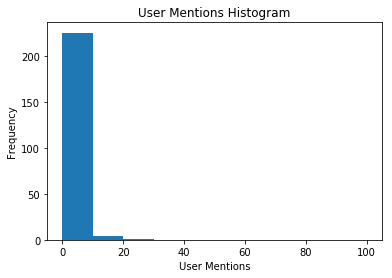

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

# Our histogram bins
bins = [0, 10, 20, 30, 40, 50, 100]

# Add a title and axis labels
plt.title("User Mentions Histogram")
plt.ylabel("Frequency")
plt.xlabel("User Mentions")

# Draw a histogram
userMentionCounter = Counter(userMentions)
plt.hist(list(userMentionCounter.values()), bins)

plt.show()

* choose a popular twitter user who has many followers in your collection of tweets.
* Get the list of all friends and all followers of the twitter user.
* Plot 20 out of the followers, plot their ID numbers and screen names in a table.
* Plot 20 out of the friends (if the user has more than 20 friends), plot their ID numbers and screen names in a table.

In [9]:
# Get users and their follower count
userAndFollowers = [{"screenName": item.get('user').get("screen_name"), "followersCount": int(item.get('user').get('followers_count'))}
                    for item in twitterData]

# Get the user with the largest number of followers
userWithMostFollowers = max(userAndFollowers, key=lambda x:x['followersCount'])

# The user whose followers and friends we will search for
user = userWithMostFollowers['screenName']

count = 20 # Number of followers/friends to get



# Search twitter for this users followers
print("Getting followers of ", user)
followers = twitterAPI.followers.list(screen_name=user, count=count)

# Get info about this users followers, namely their id and screen name
followersInfo = [{"idNumber": item.get("id"), "screenName": item.get("name")}
                for item in followers['users']]

# Print our data to a nice table
followersTable = PrettyTable()
print("20 followers of the user ", user)
followersTable.field_names = ["ID Number", "Screen Name"]

for f in followersInfo:
    followersTable.add_row([f["idNumber"], f["screenName"]])

print(followersTable)



# Search twitter for this users friends
print("Getting friends of ", user)
friends = twitterAPI.friends.list(screen_name=user, count=count)

# Get info about this users friends
friendsInfo = [{"idNumber": item.get("id"), "screenName": item.get("name")}
                for item in friends['users']]

# Print our data to a nice table
friendsTable = PrettyTable()
print("20 friends of the user ", user)
friendsTable.field_names = ["ID Number", "Screen Name"]

for f in friendsInfo:
    friendsTable.add_row([f["idNumber"], f["screenName"]])

print(friendsTable)

Getting followers of  MeridianoTV
20 followers of the user  MeridianoTV
+---------------------+----------------------+
|      ID Number      |     Screen Name      |
+---------------------+----------------------+
|  957636059579473920 |      LeonardoD       |
|      115545500      |     LUIS RICARDO     |
|      116799262      | deejay chabeto vzla  |
| 1025167611166961664 |        Pedro         |
|      2355146516     |   VIC_CARRILLO1983   |
| 1110369197685686272 |   Angel Hernandez    |
|  713730861850558465 |   pedro castellano   |
|  803784555073302528 | Marco Antonio Lopez  |
| 1059189701125566464 |   Amilcar Valente    |
| 1104566054766997504 | luis javier zambrano |
| 1093719858250952704 |        S'f 🍻         |
| 1067933296598892544 |     Hugo Osorio      |
| 1057097706529845249 |      #ELCRITICO      |
| 1085886145534328832 |  Ricardo Rodríguez   |
| 1089988304467099655 |       Leonardo       |
| 1109996538263146498 |   Alvaro Graterol    |
| 1097524269960097792 |    Nemesys_

Plot a scatter plot comparing friends and followers

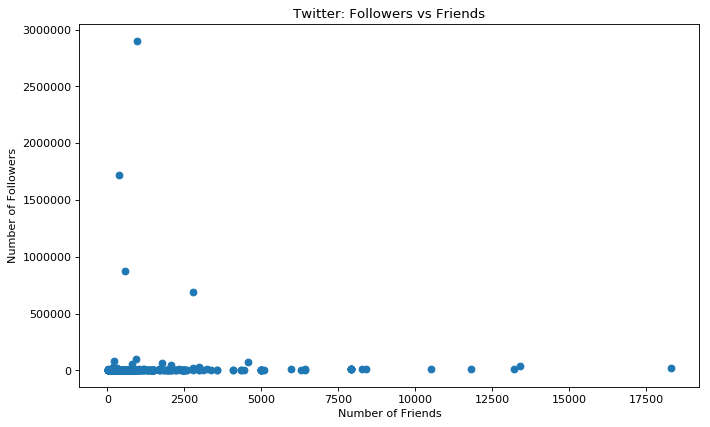

In [10]:
import np as np
from numpy import array
from matplotlib.pyplot import figure

# Get number of followers for each tweet we collected
numFollowers = [int(status.get('user').get('followers_count'))
                for status in twitterData]

# Get number of friends for each tweet we collected
numFriends = [int(status.get('user').get('friends_count'))
              for status in twitterData]

# Set figure size
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

# Plot a scatter plot
plt.title("Twitter: Followers vs Friends")
plt.xlabel("Number of Friends")
plt.ylabel("Number of Followers")

plt.scatter(numFriends, numFollowers)
plt.show()